In [1]:
#cv2.matchTemplate()，cv2.minMaxLoc()
#和 2D 卷积一样，它也是用模
#板图像在输入图像（大图）上滑动，并在每一个位置对模板图像和与其对应的
#输入图像的子区域进行比较。

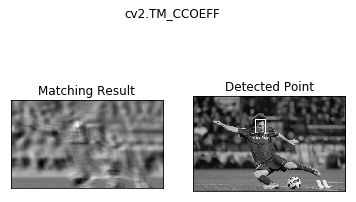

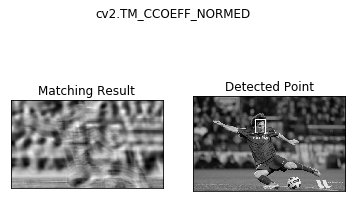

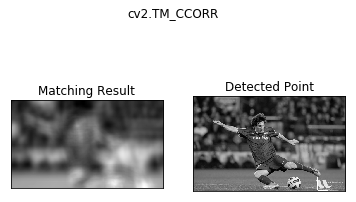

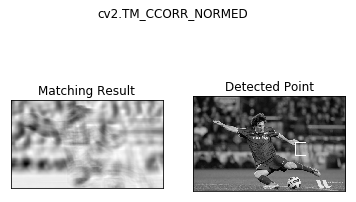

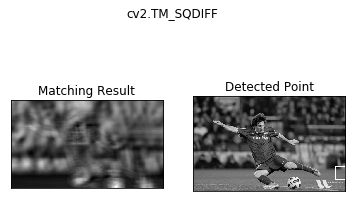

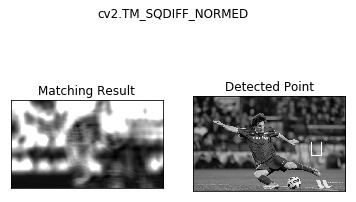

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    
#exec 语句用来执行储存在字符串或文件中的 Python 语句。
# 例如，我们可以在运行时生成一个包含 Python 代码的字符串，然后使用 exec 语句执行这些语句。
#eval 语句用来计算存储在字符串中的有效 Python 表达式
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # 使用不同的比较方法，对结果的解释不同
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
#多对象的模板匹配

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

#umpy.where(condition[, x, y])
#Return elements, either from x or y, depending on condition.
#If only condition is given, return condition.nonzero().
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
cv2.imwrite('res.png',img_rgb)